In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
#importing all the necessary packages now for later when building all the models.
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import SGDClassifier
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Loading Data

In [3]:
train_data = pd.read_csv("/kaggle/input/titanic/train.csv")
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
print(train_data.shape)
train_data.info()
train_data.describe()

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
test_data = pd.read_csv("/kaggle/input/titanic/test.csv")
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
print(test_data.shape)
test_data.info()
test_data.describe()

(418, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


# Exploratory Data Analysis

In [7]:
#cleaning the training data
train_data['Age'] = train_data['Age'].fillna(train_data['Age'].mean())
train_data['Sex'].astype('category')
train_data['Pclass'].astype('category')

train_data.drop('Ticket', axis = 1)
train_data.drop('Embarked', axis = 1)
train_data.drop('Cabin', axis = 1)
train_data.info()
train_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
#cleaning the test data
test_data['Age'] = test_data['Age'].fillna(test_data['Age'].mean())
test_data['Fare'] = test_data['Fare'].fillna(test_data['Fare'].mean())

test_data['Sex'].astype('category')
test_data['Pclass'].astype('category')

train_data.drop('Ticket', axis = 1)
train_data.drop('Embarked', axis = 1)
test_data.drop('Cabin', axis = 1, inplace = True)
test_data.info()
test_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         418 non-null    float64
 9   Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(4)
memory usage: 32.8+ KB


,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [9]:
#determining if one gender had a higher survival ratio to see if ratio plays a big role in one's chances of survival
women = train_data.loc[train_data.Sex == 'female']['Survived']
rate_women = sum(women)/len(women)

men = train_data.loc[train_data.Sex == 'male']['Survived']
rate_men = sum(men)/len(men)

print("% of women who survived:", rate_women)
print('% of men who survived:', rate_men)

% of women who survived: 0.7420382165605095
% of men who survived: 0.18890814558058924


In [10]:
data_categories = ['Pclass', 'Survived', 'Sex', 'SibSp', 'Parch', 'Embarked']

for category in data_categories:
    print(train_data[category].value_counts(dropna = False, normalize = True).sort_index())

1    0.242424
2    0.206510
3    0.551066
Name: Pclass, dtype: float64
0    0.616162
1    0.383838
Name: Survived, dtype: float64
female    0.352413
male      0.647587
Name: Sex, dtype: float64
0    0.682379
1    0.234568
2    0.031425
3    0.017957
4    0.020202
5    0.005612
8    0.007856
Name: SibSp, dtype: float64
0    0.760943
1    0.132435
2    0.089787
3    0.005612
4    0.004489
5    0.005612
6    0.001122
Name: Parch, dtype: float64
C      0.188552
Q      0.086420
S      0.722783
NaN    0.002245
Name: Embarked, dtype: float64


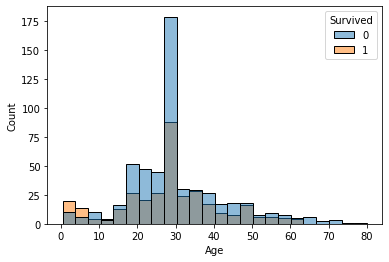

In [11]:
#Looking at the ratios to survived and didn't by age to see if age plays into the chances of someone survivng.
sns.histplot(data = train_data, x = 'Age', bins = 24, hue = 'Survived')
plt.show()

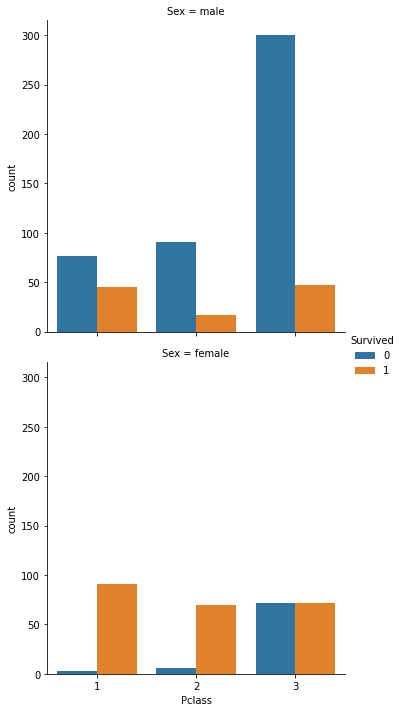

In [12]:
#Determinig if Pclass and gender correlates to a person's chance of surviing
sns.catplot(data=train_data, x="Pclass", row='Sex', hue ='Survived', kind ="count")

# Building The Models

In [13]:
#creating the feature list and setting up X and y for all the models
features = ['Sex', 'Age', 'Pclass','Fare']

X = pd.get_dummies(train_data[features])
X_test = pd.get_dummies(test_data[features])
y = train_data['Survived']

#creatring the KNeighbors Classifier Model
knn = KNeighborsClassifier(n_neighbors = 3)
fitKnn = knn.fit(X, y)
predictKnn = knn.predict(X_test)

knnAcc = knn.score(X, y)

print("KNeighbors Classifier accuracy:", knnAcc)

KNeighbors Classifier accuracy: 0.8484848484848485


In [14]:
#Linear Regression Model
reg = LinearRegression()
reg.fit(X, y)
regPredict = reg.predict(X_test)

regAcc = reg.score(X,y)

print("Linear Regression Accuracy:", regAcc)

Linear Regression Accuracy: 0.3834106117334738


In [15]:
#Decision Tree Classifier Model
tree = DecisionTreeClassifier(random_state = 1)
tree.fit(X, y)
treePredict = tree.predict(X_test)
treeAcc = tree.score(X,y)

print('Decision Tree Classifier Accuracy:', treeAcc)

Decision Tree Classifier Accuracy: 0.9797979797979798


In [16]:
#SGDClassifier model
sgd = SGDClassifier(random_state = 1)
sgd.fit(X,y)
sgdPredict = sgd.predict(X_test)
sgdAcc = sgd.score(X, y)

print('SGD Classifier Accuracy:', sgdAcc)

SGD Classifier Accuracy: 0.38047138047138046


In [17]:
from sklearn.ensemble import RandomForestClassifier
#doing the tutorial Random Forest CLassifier cause why not

model = RandomForestClassifier(n_estimators = 100, max_depth = 5, random_state = 1)
model.fit(X, y)
predictions = model.predict(X_test)
modelAcc = model.score(X, y)

print('Random Forest Classifier:', modelAcc)

Random Forest Classifier: 0.8496071829405163


# Evaluating The Models

In [18]:
#honestly I just looked at the scores and determined by which had the higher score, but this how to do it while all running at once
scores = np.array([modelAcc,treeAcc, regAcc, knnAcc, sgdAcc])

highestScore = 0

for x in scores:
    if x > highestScore:
        highestScore = x
        
if highestScore == modelAcc:
    bestModel = predictions
elif highestScore == treeAcc:
    bestModel = treePredict
elif higestScore == regAcc:
    bestModel == regPredict
elif highestScore == knnAcc:
    bestModel == predictKnn
else:
    bestModel == sgdAcc

# Generating the submission

In [19]:
#creating the output file for submitting
output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': bestModel})
output.to_csv('submission.csv', index = False)
print('Your submission was succesfully saved!')

Your submission was succesfully saved!
